C:\Users\Student\AppData\Local\Temp\ipykernel_4700\1980304073.py:43: RuntimeWarning: divide by zero encountered in divide
  distance_row = (1.0 / distance_row) ** beta


Best path: [7, 4, 6, 5, 1, 0, 2, 3, 7]
Best path length: 29.09645693603175


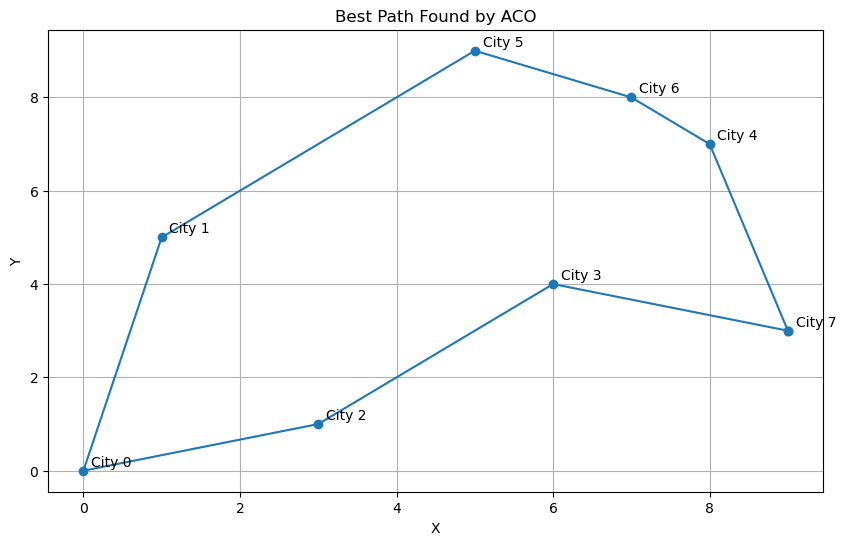

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Distance function to calculate the Euclidean distance between two cities
def euclidean_distance(city1, city2):
    return np.linalg.norm(np.array(city1) - np.array(city2))

# Initialize cities (You can modify the city coordinates)
cities = [(0, 0), (1, 5), (3, 1), (6, 4), (8, 7), (5, 9), (7, 8), (9, 3)]

# Number of cities
n_cities = len(cities)

# Initialize distance matrix
distances = np.zeros((n_cities, n_cities))
for i in range(n_cities):
    for j in range(i + 1, n_cities):
        distance = euclidean_distance(cities[i], cities[j])
        distances[i][j] = distances[j][i] = distance

# Parameters for Ant Colony Optimization
n_ants = 50  # Number of ants
n_iterations = 100  # Number of iterations (generations)
alpha = 1  # Pheromone importance
beta = 2  # Distance priority
evaporation_rate = 0.5  # Pheromone evaporation rate
pheromone_initial = 1.0  # Initial pheromone level
q = 100  # Total pheromone to be deposited

# Initialize pheromone matrix (same size as the distance matrix)
pheromone = np.ones((n_cities, n_cities)) * pheromone_initial

# Helper functions for the ACO

# Choose the next city based on the pheromone and distance
def choose_next_city(city, visited, pheromone, distances, alpha, beta):
    pheromone_row = pheromone[city]
    distance_row = distances[city]
    
    # Apply pheromone and distance weights
    pheromone_row = pheromone_row ** alpha
    distance_row = (1.0 / distance_row) ** beta
    
    # Calculate the probability for each unvisited city
    probabilities = pheromone_row * distance_row
    probabilities[visited] = 0  # Make sure not to visit already visited cities
    
    # Normalize the probabilities
    total_probability = np.sum(probabilities)
    if total_probability == 0:
        return random.choice([i for i in range(n_cities) if not visited[i]])  # Pick a random city if no pheromone
    
    probabilities /= total_probability
    return np.random.choice(range(n_cities), p=probabilities)

# Update the pheromone matrix
def update_pheromone(pheromone, all_paths, all_lengths, evaporation_rate, q):
    pheromone *= (1 - evaporation_rate)  # Evaporate the pheromone
    for path, length in zip(all_paths, all_lengths):
        for i in range(len(path) - 1):
            pheromone[path[i], path[i+1]] += q / length  # Update pheromone based on path length
    return pheromone

# Main ACO Algorithm
def ant_colony_optimization(cities, n_ants, n_iterations, alpha, beta, evaporation_rate, pheromone_initial, q):
    n_cities = len(cities)
    distances = np.zeros((n_cities, n_cities))
    
    for i in range(n_cities):
        for j in range(i + 1, n_cities):
            distance = euclidean_distance(cities[i], cities[j])
            distances[i][j] = distances[j][i] = distance
            
    pheromone = np.ones((n_cities, n_cities)) * pheromone_initial
    
    best_path = None
    best_length = float('inf')
    
    for iteration in range(n_iterations):
        all_paths = []
        all_lengths = []
        
        for _ in range(n_ants):
            visited = [False] * n_cities
            path = [random.randint(0, n_cities - 1)]  # Start from a random city
            visited[path[0]] = True
            
            for _ in range(n_cities - 1):
                current_city = path[-1]
                next_city = choose_next_city(current_city, visited, pheromone, distances, alpha, beta)
                path.append(next_city)
                visited[next_city] = True
            
            # Complete the cycle by returning to the starting city
            path.append(path[0])
            length = sum(distances[path[i], path[i + 1]] for i in range(len(path) - 1))
            
            all_paths.append(path)
            all_lengths.append(length)
            
            if length < best_length:
                best_length = length
                best_path = path
        
        # Update pheromone levels based on the paths found by the ants
        pheromone = update_pheromone(pheromone, all_paths, all_lengths, evaporation_rate, q)
    
    return best_path, best_length

# Run the ACO algorithm
best_path, best_length = ant_colony_optimization(cities, n_ants, n_iterations, alpha, beta, evaporation_rate, pheromone_initial, q)

# Print the results
print(f"Best path: {best_path}")
print(f"Best path length: {best_length}")

# Visualize the best path
x = [cities[i][0] for i in best_path]
y = [cities[i][1] for i in best_path]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
for i, city in enumerate(cities):
    plt.text(city[0] + 0.1, city[1] + 0.1, f'City {i}')
plt.title("Best Path Found by ACO")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()